In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.preprocessing import StandardScaler

In [2]:
inputfilename_train = "dataset/rba_clean.csv"


combined_set = pd.read_csv(inputfilename_train)


In [3]:
combined_set.columns

Index(['User ID', 'Round-Trip Time [ms]', 'IP Address', 'ASN',
       'User Agent String', 'Device Type', 'Login Successful', 'year', 'month',
       'day', 'hour', 'minute', 'Is Failed Login', 'Is Attack', 'Day Slot',
       'Browser Family', 'OS Family', 'Is Bot'],
      dtype='object')

In [4]:
combined_set.drop(['User Agent String','IP Address'],  axis='columns', inplace=True)



In [5]:
combined_set.columns

Index(['User ID', 'Round-Trip Time [ms]', 'ASN', 'Device Type',
       'Login Successful', 'year', 'month', 'day', 'hour', 'minute',
       'Is Failed Login', 'Is Attack', 'Day Slot', 'Browser Family',
       'OS Family', 'Is Bot'],
      dtype='object')

In [6]:
# Scaling all numeric columns using StandardScaler- Apply to all the numeric columns
header_names=['User ID', 'Round-Trip Time [ms]', 'ASN', 'Device Type',
       'Login Successful', 'year', 'month', 'day', 'hour', 'minute',
       'Is Failed Login', 'Is Attack', 'Day Slot', 'Browser Family',
       'OS Family', 'Is Bot']

numeric_cols = ['User ID', 'Round-Trip Time [ms]', 'ASN', 'year', 'month', 'day', 'hour', 'minute']

standard_scaler = StandardScaler().fit(combined_set[numeric_cols])

combined_set[numeric_cols] = \
    standard_scaler.transform(combined_set[numeric_cols])



In [7]:
combined_set.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
User ID,12666.0,3.926890e-18,1.000039,-1.653082,-0.701595,-0.211752,0.860717,1.930725
Round-Trip Time [ms],12666.0,1.121969e-17,1.000039,-0.667111,-0.189841,-0.119288,0.023893,76.642393
ASN,12666.0,-3.982989e-17,1.000039,-0.659518,-0.286093,-0.286093,-0.140771,5.755961
Login Successful,12666.0,6.839571e-01,0.464948,0.000000,0.000000,1.000000,1.000000,1.000000
year,12666.0,-2.931199e-14,1.000039,-0.384180,-0.384180,-0.384180,-0.384180,2.602945
month,12666.0,1.077090e-16,1.000039,-1.559375,-0.977409,-0.104461,0.768488,1.641437
day,12666.0,-4.207382e-18,1.000039,-1.684670,-0.890840,0.016394,0.923628,1.717458
hour,12666.0,1.851248e-17,1.000039,-2.789124,-0.780650,0.022739,0.826129,1.830366
minute,12666.0,-7.124501e-17,1.000039,-1.719965,-0.851425,0.017116,0.885656,1.696294
Is Failed Login,12666.0,3.160429e-01,0.464948,0.000000,0.000000,0.000000,1.000000,1.000000


In [8]:
#One Hot encoding
combined_set = pd.get_dummies(combined_set,columns =['Device Type','Day Slot', 'Browser Family',
                                              'OS Family', 'Is Bot'], prefix=['DeviceType', 'DaySlot','Browser','OS','Bot'])


In [9]:
combined_set.head()

,User ID,Round-Trip Time [ms],ASN,Login Successful,year,month,day,hour,minute,Is Failed Login,...,OS_Android,OS_BlackBerry OS,OS_KaiOS,OS_Linux,OS_MeeGo,OS_Other,OS_Windows,OS_Windows Phone,OS_iOS,Bot_False
0,-0.701595,-0.152489,-0.340515,0,2.602945,-1.268392,0.470011,-0.981498,1.638391,1,...,0,0,0,0,0,0,0,0,1,1
1,0.943557,0.492863,-0.140771,1,-0.384180,-0.977409,0.129798,1.227824,-1.430452,0,...,0,0,0,0,0,0,0,0,1,1
2,-1.445500,-0.105800,-0.140771,1,-0.384180,-0.104461,1.377245,-0.579803,1.696294,0,...,0,0,0,0,0,0,0,0,1,1
3,0.413137,-0.152489,-0.286093,0,-0.384180,1.350454,-1.457862,1.830366,1.406780,1,...,0,0,0,0,0,0,0,0,1,1
4,0.691296,-0.632872,5.674829,1,-0.384180,0.477505,-1.344457,-0.981498,1.406780,0,...,1,0,0,0,0,0,0,0,0,1


In [10]:
#stratified sampling based on the "is_attack" column
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(combined_set, combined_set["Is Attack"]):
    strat_train_set = combined_set.loc[train_index]
    strat_test_set = combined_set.loc[test_index]

In [11]:
#note that drop() creates a copy of the data(unless inplace=True) and does not affect strat_train_set
rba_train_X = strat_train_set.drop('Is Attack', axis=1)
rba_train_Y = strat_train_set["Is Attack"].copy()

rba_test_X = strat_test_set.drop('Is Attack', axis=1)
rba_test_Y = strat_test_set["Is Attack"].copy()

## Decision Tree Classification

In [16]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

classifier = DecisionTreeClassifier(random_state=17)
classifier.fit(rba_train_X, rba_train_Y)

pred_y = classifier.predict(rba_test_X)


results = confusion_matrix(rba_test_Y, pred_y)
error = zero_one_loss(rba_test_Y, pred_y)
tn, fp, fn, tp = results.ravel()
print("True Negative --> ",tn)
print("False positive --> ",fp)
print("False Negative --> ",fn)
print("True Positive --> ",tp)

print(results)
print(error)
print(np.unique(pred_y, return_counts=True))
print(np.unique(rba_test_Y, return_counts=True))

True Negative -->  2470
False positive -->  21
False Negative -->  24
True Positive -->  19
[[2470   21]
 [  24   19]]
0.017758484609313285
(array([0, 1], dtype=int64), array([2494,   40], dtype=int64))
(array([0, 1], dtype=int64), array([2491,   43], dtype=int64))


#### Confusion Matrix
           | Positive Prediction | Negative Prediction
               
Negative Class(Benign) | True Negative (TN) | False Positive (FP)
Positive Class(Attack) | False Negative (FN) | True Positive (TP)  

###### Purpose of confusion matrix: To get an idea of number of times instances of class A are identified as class B.

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.
The first row of this matrix considers non-attack(0, Benign) login attempts (the negative class):
2470 of them were correctly classified as benign (they are called true negatives), while the remaining 21 were wrongly classified as attack (false positives).

The second row considers the attack cases (the positive class): 24 classified as benign (false negatives), while the remaining 19 were correctly classified as attack (true positives)



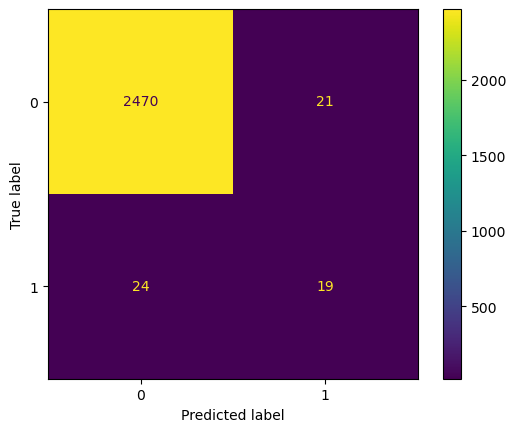

In [18]:
# Display confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(results).plot()

## To Be Added

- Further Feature selection based on feature importance in the model, new features can be added, created from existing features 

- Logistic Regression

- Random Forest

- Isolation Forest

- KMeans cluster

- Model Cross-Validation(using StratifiedKFold), Model selection, Hyperparameter tuning(Using RandomizedSearchCV for identifying \ best combination of hyperparameters)

These 2 models are good for Identifying and predicting rare or unusual data points

- One Class SVM(works well for Under 100 features,aggressive boundary)
- PCA-Based Anomaly Detection (Fast training times)

SKLearn has these in addition to 1 class SVM for outlier or anomaly detection
- Isolation Forest, 
- Local Outlier Factor, 
- Robust Covariance.

## ROC Curves and Precision-Recall Curves 

provide a diagnostic tool for binary classification models.
ROC AUC and Precision-Recall AUC provide scores that summarize the curves and can be used to compare classifiers.

In [22]:
#Precision and Recall
from sklearn.metrics import precision_score, recall_score

#accuracy of the positive predictions: Precision
ps = precision_score(rba_test_Y, pred_y) # == TP / (TP + FP)
print("Precision Score ---> ",ps)

# precision is typically used along with another metric named recall, also called sensitivity or true positive rate
# (TPR): this is the ratio of positive instances that are correctly detected by the classifier
rs = recall_score(rba_test_Y, pred_y) # == TP / (TP + FN)
print("Recall score ---> ",rs)

#F1 Score: The F1 score is the harmonic mean of precision and recall. (2/(1/precision + 1/recall))
#the classifier will only get a high F1 score if both recall and precision are high.
from sklearn.metrics import f1_score
f1s = f1_score(rba_test_Y, pred_y)
print("F1 score ---> ",f1s)

Precision Score --->  0.475
Recall score --->  0.4418604651162791
F1 score --->  0.4578313253012048


In [ ]:
# After more feature Engineering and model selection, scores can be improved. 
#These metrics must be used to compare classifiers and choose the best.
''' The F1 score favors classifiers that have similar precision and recall.
Decision to be taken on whether we want high precision or high recall.

Precision: When this classifier claims a login attempt to be attack, it is accurate only 47.5 percent of the time. 
Recall:  This classifier is able to catch only 44% of the attacks 
'''

### TODO

- Plot "Precision and recall versus the decision threshold"
Decision threshold of classifiers can be manipulated to achieve desired precision/recall tradeoff. When classification is done based on a decision function,such that for each instance, it computes a score based on a decision function,
and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. If Threshold is raised, precision will increase, recall decreases.Lowering the threshold increases recall and reduces precision. Most classifiers use a decision threshold.
- plot 'Precision versus recall'
- ROC Curve
Receiver operating characteristic (ROC) curve is another common tool used with binary classifiers. It is very similar to the precision/recall curve, but instead of plotting precision versus recall, the ROC curve plots the true positive rate (another name for recall) against the false positive rate. The FPR is the ratio of negative instances that are incorrectly classified as positive. TNR is also called specificity. Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.